<div class="alert alert-success">
  <strong>DATASET:</strong> 5j0n_ProjectionsAngles_ProjNber5000_AngCoverage2.0,0.4,2.0_AngShift0.0,0.0,0.0.h5
    <br/>
    <strong>PROJECTION DISTANCE (d_P):</strong> estimated distances (model nosiy_var0.h5)
</div>

# Reconstruction

<div class="alert alert-danger">
  <strong>NOTE:</strong> This is done on a PC where I don't need X11 forwarding (since <code>mayavi</code> is a graphic package, and the lab's server doesn't support X11).
</div>

Reference: https://tomroelandts.com/articles/astra-toolbox-tutorial-reconstruction-from-projection-images-part-2

In [10]:
# !pip install mayavi

In [1]:
# !pip install gast

In [3]:
# from numba import cuda
# cuda.select_device(0)
# cuda.close()

In [1]:
import numpy as np
from os import mkdir
from os.path import join, isdir
from imageio import imread, imwrite
import matplotlib.pyplot as plt
import astra
import h5py
import os
import mrcfile
#from tvtk.api import tvtk
from mayavi import mlab
from IPython.display import Image
import sys
sys.path.append("../..") 
from cryoem.reconstruction import reconstruct
from cryoem.conversions import quaternion2euler

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9625935042129208783
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15036738270101781613
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7013780047890132001
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3445096448
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11199493502766825033
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


---

# Reconstruction with Ground-Truth Angles

## Reconstruction

In [3]:
projections = np.load("data/projections.npy")
angles_predicted = np.load("data/angles_true.npy")
reconstruction = reconstruct(projections[:3000], angles_predicted[:3000], mrc_filename=None)

In [4]:
mlab.contour3d(reconstruction, transparent=True)
mlab.colorbar(orientation='vertical')
# mlab.savefig("data/5a1a_projections_and_angles.tiff")
mlab.show()

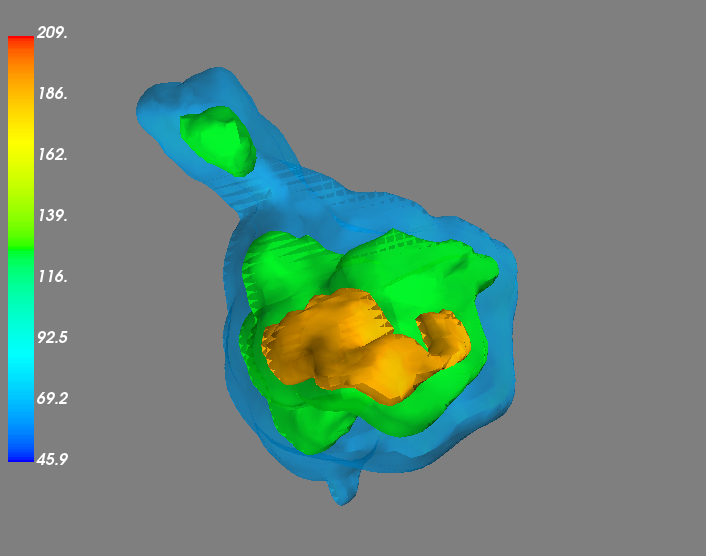

In [8]:
Image(filename='data/ground_truth_reconstruction.png')

---

# Reconstruction after Angle Recovery

## Reconstruction

In [5]:
projections = np.load("data/projections.npy")
angles_predicted = np.load("data/angles_predicted_limited3.14_estimated_50k.npy")
reconstruction = reconstruct(projections[:3000], angles_predicted[:3000], mrc_filename=None)

In [6]:
mlab.contour3d(reconstruction, transparent=True)
mlab.colorbar(orientation='vertical')
# mlab.savefig("data/5a1a_projections_and_angles.tiff")
mlab.show()

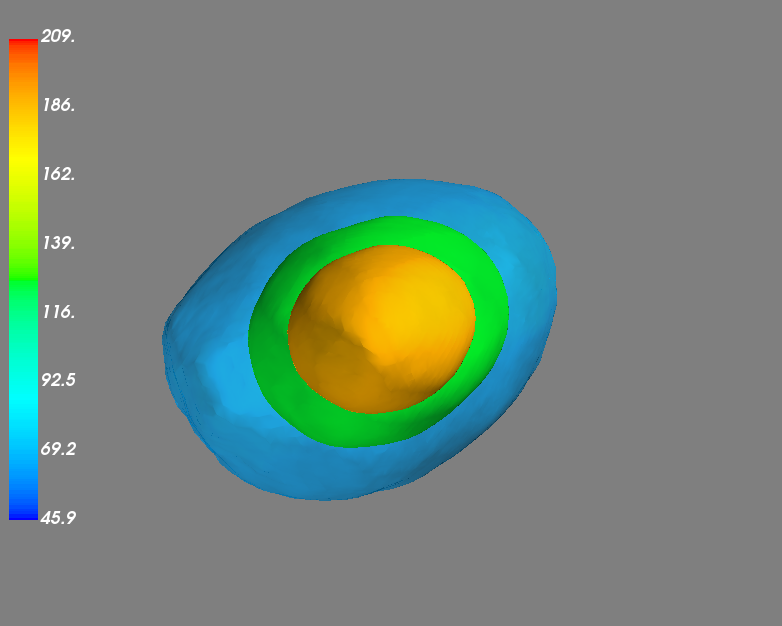

In [7]:
Image(filename='data/estimated_le3.14_50k_not_aligned.png')

---

# Reconstruction after Angle Alignment

## Reconstruction

In [9]:
projections = np.load("data/projections.npy")
angles_predicted = np.load("data/angles_predicted_rotated_limited3.14_estimated_50k.npy")
reconstruction = reconstruct(projections[:3000], angles_predicted[:3000], mrc_filename=None)

In [10]:
mlab.contour3d(reconstruction, transparent=True)
mlab.colorbar(orientation='vertical')
# mlab.savefig("data/5a1a_projections_and_angles.tiff")
mlab.show()

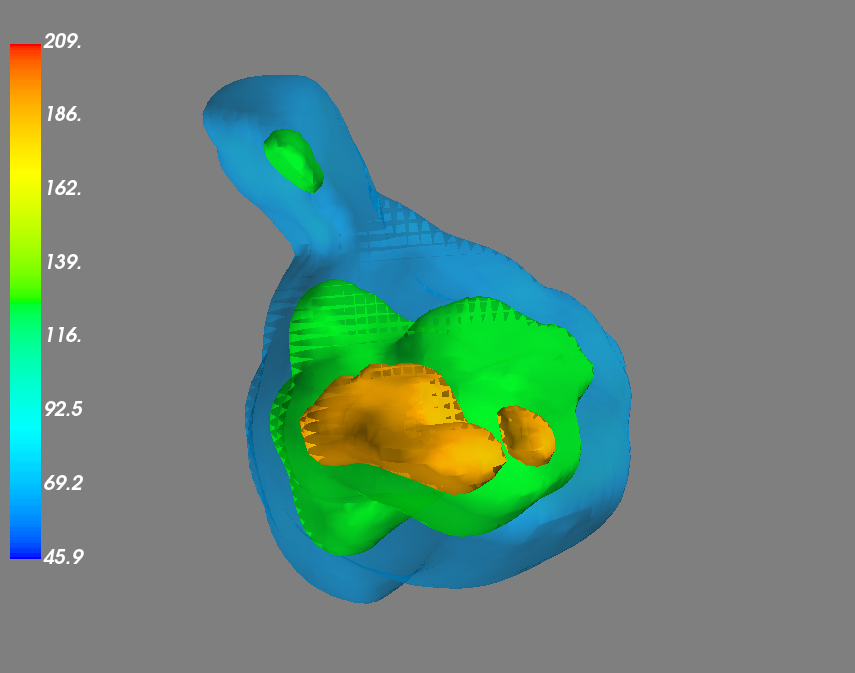

In [11]:
Image(filename='data/estimated_le0.5_50k_aligned.png')

---